In [1]:
import pandas as pd
import numpy as np

In [4]:
df_traf_MER=pd.read_csv('raw_traffic_MER.csv')

In [5]:
df_traf_MER.head()

,type,road_type,traffic_level,traffic_road_coverage,road_closure,road_category,road_subcategory,left_hand_traffic,coordinates,date,time,station
0,LINESTRING,NaN,0.559,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:35:26,MER
1,LINESTRING,NaN,0.409,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:04:30,MER
2,LINESTRING,NaN,0.105,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:34:55,MER
3,LINESTRING,NaN,0.532,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:48:24,MER
4,LINESTRING,NaN,0.527,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:05:11,MER


In [7]:
df_traf_MER.shape

(5894, 12)

## HANDLING NULL VALUES 

In [9]:
df_traf_MER.isnull().sum()

type                        0
road_type                5894
traffic_level               0
traffic_road_coverage       0
road_closure             5894
road_category               0
road_subcategory         5894
left_hand_traffic        5894
coordinates                 0
date                        0
time                        0
station                     0
dtype: int64

In [13]:
df_traf_MER.drop(['road_type', 'road_closure','road_subcategory','left_hand_traffic'], axis=1, inplace=True)


In [14]:
df_traf_MER.head()

,type,traffic_level,traffic_road_coverage,road_category,coordinates,date,time,station
0,LINESTRING,0.559,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:35:26,MER
1,LINESTRING,0.409,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:04:30,MER
2,LINESTRING,0.105,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:34:55,MER
3,LINESTRING,0.532,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:48:24,MER
4,LINESTRING,0.527,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:05:11,MER


## VERIFYING CATEGORY COLOUMNS

In [23]:
df_traf_MER['type'].unique()

array(['LINESTRING'], dtype=object)

In [22]:
# Get unique values from each of the columns separately
unique_type = df_traf_MER['type'].unique()
unique_traffic_road_coverage = df_traf_MER['traffic_road_coverage'].unique()
unique_road_category = df_traf_MER['road_category'].unique()

# Display the unique values
print("Unique values in 'type':", unique_type)
print("Unique values in 'traffic_road_coverage':", unique_traffic_road_coverage)
print("Unique values in 'road_category':", unique_road_category)


Unique values in 'type': ['LINESTRING']
Unique values in 'traffic_road_coverage': ['full']
Unique values in 'road_category': ['primary']


## OUTLIERS

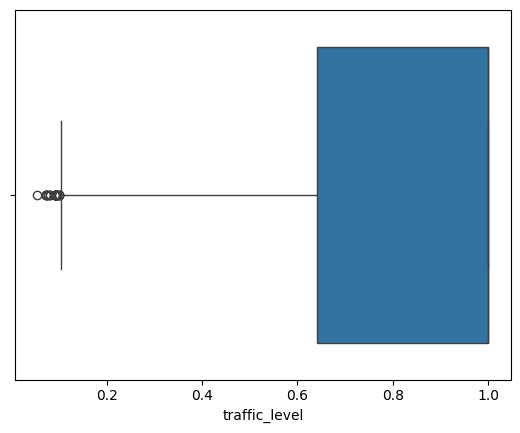

In [19]:
numeric_columns = df_traf_MER.select_dtypes(include=['float64', 'int64']).columns

import seaborn as sns 
import matplotlib.pyplot as plt

for col in numeric_columns:
   sns.boxplot(x=df_traf_MER[col])
   plt.show()  



In [26]:
# Define the bounds for outliers (using IQR method as an example)
Q1 = df_traf_MER['traffic_level'].quantile(0.25)
Q3 = df_traf_MER['traffic_level'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN (or you can directly handle it without NaN, but NaN is useful for imputation)
df_traf_MER['traffic_level'] = df_traf_MER['traffic_level'].where(
    (df_traf_MER['traffic_level'] >= lower_bound) & (df_traf_MER['traffic_level'] <= upper_bound),
    other=float('nan')  # Set outliers to NaN for forward fill
)

# Apply forward fill to fill NaN values (outliers)
df_traf_MER['traffic_level'] = df_traf_MER['traffic_level'].ffill()

# Display the updated dataframe
df_traf_MER.head()



,type,traffic_level,traffic_road_coverage,road_category,coordinates,date,time,station
0,LINESTRING,0.559,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:35:26,MER
1,LINESTRING,0.409,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:04:30,MER
2,LINESTRING,0.409,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:34:55,MER
3,LINESTRING,0.532,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:48:24,MER
4,LINESTRING,0.527,full,primary,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:05:11,MER


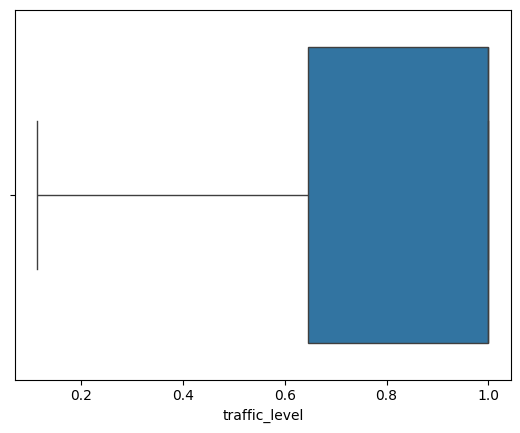

In [27]:
numeric_columns = df_traf_MER.select_dtypes(include=['float64', 'int64']).columns

import seaborn as sns 
import matplotlib.pyplot as plt

for col in numeric_columns:
   sns.boxplot(x=df_traf_MER[col])
   plt.show()

In [29]:
df_traf_MER.coordinates

0       [[19.424477059181264, -99.12001624703407], [19...
1       [[19.424477059181264, -99.12001624703407], [19...
2       [[19.424477059181264, -99.12001624703407], [19...
3       [[19.424477059181264, -99.12001624703407], [19...
4       [[19.424477059181264, -99.12001624703407], [19...
                              ...                        
5889    [[19.424477059181264, -99.12001624703407], [19...
5890    [[19.424477059181264, -99.12001624703407], [19...
5891    [[19.424477059181264, -99.12001624703407], [19...
5892    [[19.424477059181264, -99.12001624703407], [19...
5893    [[19.424477059181264, -99.12001624703407], [19...
Name: coordinates, Length: 5894, dtype: object

In [31]:
# View the first row of the 'coordinates' column
print(df_traf_MER['coordinates'][0])  # This will show the full list for row 0



[[19.424477059181264, -99.12001624703407], [19.42455041669, -99.12004306912422], [19.42469207256894, -99.12010878324509], [19.424737604815746, -99.12015169858932]]
